In [82]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Theme only
from IPython.core.display import display #used to display big lists

# sets the theme of the charts
# plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', 500)
%matplotlib inline

C:\Users\thegr\AppData\Local\Temp\ipykernel_1156\977745594.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display #used to display big lists


In [83]:
#Loading the three datasets
charts_df = pd.read_csv('ph_spotify_daily_charts.csv')
charts_artists_df = pd.read_csv('ph_spotify_daily_charts_artists.csv')
charts_tracks_df = pd.read_csv('ph_spotify_daily_charts_tracks.csv')

In [84]:
def print_df(df, head=10):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df.head(head))

## Dataset Description

This notebook will be utilizing the dataset called "Spotify Daily Top 200 Tracks in the Philippines".
It contains information about the Daily Top 200 most streamed songs on Spotify from January 1, 2017 until March 31, 2023. 

The entire dataset is seperated into three files.

The **first file** contains data about the tracks that made it to the Top 200 for a specific day. The following are descriptions of each variable in the dataset. 
- **`date`**: the exact date the track is in the Daily Top 200 Chart.
- **`position`**: the position of the track based on the number of streams. Values are limited in the range of 1 to 200.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>"
- **`track_name`**: the name of the track/song
- **`artist`**: the name of the artist who made the track/song
- **`streams`**: number of times the song was played

The file was loaded in the code blocks below. It contains *456200* observations, each observation representing a track that was part of the Daily Top 200 Chart for a specific day. It means that it can contain multiple instances for the same track, given that it belongs to the Top 200 Charts for a different date.

In [85]:
charts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456201 entries, 0 to 456200
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        456201 non-null  object
 1   position    456201 non-null  int64 
 2   track_id    456201 non-null  object
 3   track_name  456191 non-null  object
 4   artist      456191 non-null  object
 5   streams     456201 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.9+ MB


In [86]:
#Top 5 songs for January 1st, 2017
charts_df.head(5)

,date,position,track_id,track_name,artist,streams
0,01/01/2017,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,01/01/2017,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,01/01/2017,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,01/01/2017,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,01/01/2017,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


The **second file** contains information about the artists who made the songs that reached the Daily Top 200 Charts. The following are descriptions of each variable in the dataset.
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform.
- **`artist_name`**: the name of the artist
- **`total_followers`**: the number of followers the artist had on the time of recording the data
- **`genres`**: an array containing the genres the artist is associated with (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-artist)
- **`popularity`**: an integer between 0 being the lowest to 100 being the highest, representing the popularity of the artist calculated from all of their tracks.

The code blocks below show that there are *988* observations for this file, each observation representing a unique artist whose tracks made it into the Daily Top 200 Charts atleast once.

In [87]:
charts_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_id        988 non-null    object
 1   artist_name      988 non-null    object
 2   total_followers  988 non-null    int64 
 3   genres           988 non-null    object
 4   popularity       988 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.7+ KB


In [88]:
#First 5 artists in the dataset
charts_artists_df.head(5)

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,"['dance pop', 'pop']",89
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,"['pop', 'talent show', 'uk pop']",82
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006,['pop'],86
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540,"['dance pop', 'pop', 'post-teen pop']",73


The **third file** contains data about the specific details about the tracks listed in the **first file**. The following are descriptions of each variable in the dataset.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>". Identical to their respective observations in the **first file**
- **`track_name`**: the name of the track/song. Identical to their respective observations in the **first file**
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform. Identical to their respective observations in the **second file**
- **`artist_name`**: the name of the artist. Identical to their respective observations in the **second file**
- **`album_id`**: the unique identifier Spotify uses for the album that contains the track/song (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-album)
- **`duration`**: the duration of the song in milliseconds
- **`release_date`**: the date the album containing the track/song was released
- **`popularity`**: the popularity of the album represented as an integer between 0 being the lowest to 100 being the highest
- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`key`**: a value ranging from -1 to 11 representing the key the track is in using Standard Pitch Class Notation. e.g. 0 = C, 1 = C#/Db, and so on. -1 is the sentinel value. 
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db
- **`mode`**: a value of either 0 or 1 indicating the modality of a track, 0 represents *minor* and 1 represents *major*
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

The code blocks below show that the file contains *4768* observations, each observation representing a unique track that was in the Daily Top 200 Charts atleast once.

In [89]:
charts_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4768 non-null   object 
 1   track_name        4763 non-null   object 
 2   artist_id         4768 non-null   object 
 3   artist_name       4763 non-null   object 
 4   album_id          4768 non-null   object 
 5   duration          4768 non-null   int64  
 6   release_date      4768 non-null   object 
 7   popularity        4768 non-null   int64  
 8   danceability      4767 non-null   float64
 9   energy            4767 non-null   float64
 10  key               4767 non-null   float64
 11  loudness          4767 non-null   float64
 12  mode              4767 non-null   float64
 13  speechiness       4767 non-null   float64
 14  acousticness      4767 non-null   float64
 15  instrumentalness  4767 non-null   float64
 16  liveness          4767 non-null   float64


In [90]:
charts_tracks_df.head(5)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


# Data Cleaning

Before Exploratory Data Analysis could be performed, the dataset first needs to be cleaned. The first method of data cleaning that will be explored is dealing with duplicate songs but are given two different track ids. This usually happens when an artist releases two copies of the same song in Spotify, usually one being a single and another being part of a whole album. For the purposes of this project, we wish to consider these duplicate entries of the song as 1 song only. As such, for data cleaning, duplicate entries of a song need to first be detected and then promptly manipulated in such a way as to result in 1 single entry per song, wwhile still keeping the relevant information given by the duplicate entries.

To do so, we search for tracks which have duplicate names in the tracks dataset.

In [91]:
#Get a series where each observation is a boolean which states whether its corresponding index in charts_tracks_df has a duplicate
charts_tracks_dupe_trackname = charts_tracks_df.duplicated(subset='track_name', keep=False)

#Introduce charts_tracks_dupe_trackname as a column in charts_tracks_df
charts_tracks_df['duplicate_by_name'] = charts_tracks_dupe_trackname

#Looks for a track whos potentially a duplicate and whos track name is "'Di Na Babalik" as an example
charts_tracks_df.query("duplicate_by_name == True")[charts_tracks_df['track_name'] == "'Di Na Babalik"]

C:\Users\thegr\AppData\Local\Temp\ipykernel_1156\2831901673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  charts_tracks_df.query("duplicate_by_name == True")[charts_tracks_df['track_name'] == "'Di Na Babalik"]


,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1951,5S4T2Pdr8qhetF3UhkwuMj,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,7zJxOlHuAGpCC7ZtKHm0Rz,340262,2019-02-03,0,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.112,0.14,76.132,True
2061,7hoP5NDUXEbmOawvEAsi8h,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,0pFRzLxgSt9QlXKuukR8A4,340262,2019-02-03,1,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.112,0.14,76.132,True


This method is effective in detecting observations with the same **track_name**. We can also see that the reason these duplicate observations were allowed to exist is because they have unique values for the **track_id** variable, which is Spotify's way for uniquely identifying tracks. This can be seen with the observations whose **track_name** values are both *'Di Na Babalik* which was also performed by the same artist and has completely identical values for the rest of the variables which allows us to conclude that these two observations are indeed duplicates. A theory as to why these duplicates exist is because although they are the exact same track, they are uploaded multiple times to Spotify for various reasons, leading Spotify to treat it as different tracks.

Although this detects observations with the same **track_name** values, there are several issues that arise from this method. A major issue that can be seen is that since it only detects duplicates by one variable, it ignores cases of duplicates where the variable has different values leading to *false negatives* in checking for duplicates. An example of one such case is shown below:

In [92]:
charts_tracks_df[charts_tracks_df['track_name'].str.contains('DALLA DALLA') == True]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1952,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,2KC9Qb60EaY0kW4eH68vr3,ITZY,2gHd5bCrj42s8nwwXBALd4,199873,2019-02-13,0,0.79,0.853,11.0,-4.564,0.0,0.0666,0.00116,0.000042,0.329,0.713,125.000,False
1976,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),2KC9Qb60EaY0kW4eH68vr3,ITZY,0fUJLlrsG1MpTHr3MxPN9C,199873,2019-02-12,0,0.79,0.853,11.0,-4.564,0.0,0.0665,0.00116,0.000042,0.329,0.713,124.998,False


It also presents an issue where observations with the same **track_name** values are detected but they should not be considered duplicates. An example is shown below:

In [93]:
charts_tracks_df[charts_tracks_df['track_name'] == '\'Di Na Muli']

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1360,3VQb0rq27GPX92X53Ni1Lc,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,1hwjIPHrnNBFuxWBWRHmge,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.192,0.0,0.0914,0.352,88.690,True
1376,0eKQS9aRwCW2J5q6uDKX7S,'Di Na Muli,5cYJYBMg1n71v7cvthr1SO,The Itchyworms,3sBZBmTeB7QMWL4by9ybWm,260599,2018-05-15,0,0.517,0.468,4.0,-6.582,1.0,0.0345,0.702,0.0,0.1520,0.266,121.284,True
1389,0rkML0CSX3wteVwUh5cspv,'Di Na Muli,5cYJYBMg1n71v7cvthr1SO,The Itchyworms,3GX88wDTaudQN9oK5j4kf1,260599,2018-06-04,0,0.517,0.468,4.0,-6.582,1.0,0.0345,0.702,0.0,0.1520,0.266,121.284,True
2063,6p6DiqAPwMX7vdrSo30wgo,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,4u7nLwDVRz7z0mxweMbVZ6,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.192,0.0,0.0914,0.352,88.690,True


As we can see, the first example shows that they are not considered as duplicates as seen where their **duplicate_by_name** variable is flagged as *False*. The second example then shows four observations with all equal titles but as observed, only two of the four observations that are flagged as **duplicates** are actually duplicates and the rest are *false positives*.

To address these inconsistencies present in the dataset, a new method to clean the dataset is required. From observing similarities in values between duplicate entries, it is apparent that the **duration** and **artist_name** values of the tracks are identical. This makes sense, seeing that a duplicate track uploaded by an artist would still be the same song, just under different **track_id**s.

An implementation of this can be seen below:

In [94]:
charts_tracks_dupe_artistname_duration = charts_tracks_df.duplicated(subset=['duration','artist_name'], keep=False)

charts_tracks_df['duplicate_by_artistname_duration'] = charts_tracks_dupe_artistname_duration
possible_duplicates_df = charts_tracks_df.query("duplicate_by_artistname_duration == True").sort_values(by=['artist_name', 'duration'], inplace=False)


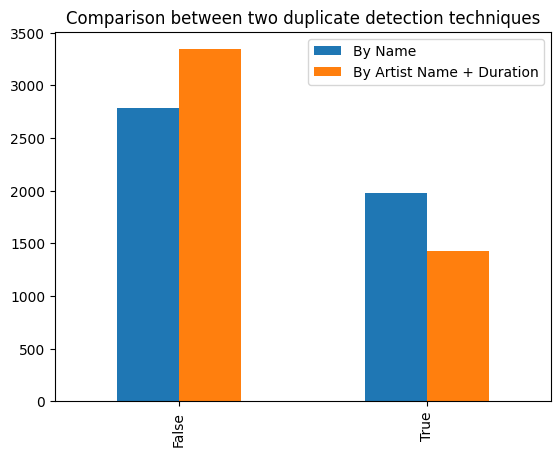

In [95]:
duplicate_by_name_counts = charts_tracks_df["duplicate_by_name"].value_counts()
duplicate_by_artistname_duration_counts = charts_tracks_df["duplicate_by_artistname_duration"].value_counts()
duplicate_comparison_df = pd.DataFrame({"By Name": duplicate_by_name_counts, "By Artist Name + Duration": duplicate_by_artistname_duration_counts})

duplicate_bar_plot = duplicate_comparison_df.plot.bar(title = "Comparison between two duplicate detection techniques")
plt.show()

As we can see, changing the variables used to detect for duplicated led to better results wherein less observations are flagged as duplicates, thereby reducing *false positives* when detecting duplicates. It is not a 100% guarantee that all the *positive* observations are truly duplicates so at this point, there is no choice but to examine every observation that are considered as a duplicate.

This also addresses the first problem of *false negatives* discussed earlier since it is now dependent on variables that is more uniquely identifiable to a given song.

In [96]:
charts_tracks_df[charts_tracks_df['track_name'].str.contains('DALLA DALLA') == True]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration
1952,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,2KC9Qb60EaY0kW4eH68vr3,ITZY,2gHd5bCrj42s8nwwXBALd4,199873,2019-02-13,0,0.79,0.853,...,-4.564,0.0,0.0666,0.00116,0.000042,0.329,0.713,125.000,False,True
1976,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),2KC9Qb60EaY0kW4eH68vr3,ITZY,0fUJLlrsG1MpTHr3MxPN9C,199873,2019-02-12,0,0.79,0.853,...,-4.564,0.0,0.0665,0.00116,0.000042,0.329,0.713,124.998,False,True


Now we can easily scan the dataset in order to double check and handle the duplicates. Luckily, this also includes observations that have empty **track_name** and **artist_name** variables which we could assume are deleted songs and should be excluded in the datasets.

After examining the dataset, we can now remove the *false positives* that remained.  

In [97]:
false_positive_ids = ['27OeeYzk6klgBh83TSvGMA', '1EHUQesfVKwbthtNcpBi9g', '4HBvwhhYo7YiYXkUDrOHzS', '2UYG331lOP6amEWplE7eno', '5EzitieoPnjyKHAq0gfRMa', '01QhKtUc12FGw2wX7dMYvv', '59c0HrzmHfyQs6LgDw5cHe',
                      '0VwNdo84DaVYLIkbVO86ND', '7AWtaOSb7cgi16wJr3mkuf', '3AyLh4R4D3fQfyqCsTdFf3', '514mQDPkXmPzsYwGNmkBJZ', '1QCqedB1ibmRO9x7Ikb5LI', '4VYEnxm7lmtG5sEEbcmORB', '3h34cQPPddk4x9cluPIAvv',
                      '2CWnuF7ht55Ajyeg4WPvWu', '3i9UVldZOE0aD0JnyfAZZ0', '6KUE0HSSudAp9AOycaF6SH', '314ZkcV7oLWG8yWE7LABvH', '3FeVmId7tL5YN8B7R3imoM', '2sp32rIevQhpbo0Z4aQzoe', '42CeaId2XNlxugDvyqHfDf',
                      '7CZyCXKG6d5ALeq41sLzbw', '3OaBCFROgrLRbZGCFP6E3M', '6ce41JVa6KFaryfmC2bu2W', '7oDd86yk8itslrA9HRP2ki', '57Enap29zKl7NGRdDJjkjA', '6g1NlCpW7fgqDnWbCCDrHl', '0nrRP2bk19rLc0orkWPQk2']

#remove all the observations in the false_positive_ids from the dataset
possible_duplicates_df = possible_duplicates_df[~possible_duplicates_df['track_id'].isin(false_positive_ids)]

Now instead of using the contents of **possible_duplicates_df** to clean up the **charts_tracks_df** DataFrame, we first need it to use it to clean **charts_df**. This is because the **charts_df** DataFrame also contains the duplicate observations that were presented. 

The plan is to first set up a lookup table wherein duplicate observations would be replaced by one observation that represents that specific group of duplicates, essentially grouping the duplicates into one main observation.

In [98]:
original_artist_name = None
original_duration = None
original_track_name = None
original_track_id = None

result_list = []
for idx, row in possible_duplicates_df.iterrows():
    curr_artist_name = row['artist_name']
    curr_duration = row['duration']
    curr_track_name = row['track_name']
    curr_track_id = row['track_id']

    if ((original_artist_name != curr_artist_name) or (original_duration != curr_duration)):
        original_artist_name = curr_artist_name
        original_duration = curr_duration
        original_track_name = curr_track_name
        original_track_id = curr_track_id
    else:
        result = {'original_track_id': original_track_id, 'original_track_name': original_track_name, 'duplicate_track_id': curr_track_id, 'duplicate_track_name': curr_track_name}
        result_list.append(result)
lookup_duplicate_df = pd.DataFrame(result_list)
print_df(lookup_duplicate_df, 20)

    

,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
0,3ZoHHYydoQNWIKdP59knYA,Pajama Party,1K3qfNiMOzI5cbILMuWnRN,Pajama Party (Cypher1)
1,5eqK0tbzUPo2SoeZsov04s,Bank Account,2fQrGHiQOvpL9UgPvtYy6G,Bank Account
2,55S2PQgSMYAhgoTCcGCDfw,Youngblood,2iUXsYOEPhVqEBwsqP70rE,Youngblood
3,4ZYdtbaKQsa5jSeQYjKoop,KNOW ME,5HthkOEb7X9jUiBeJFHOlY,KNOW ME
4,3CboywxfJIgvHqi2FF4exb,Loverboy,0qXP5fMhxGzxALOkXYUxfP,Loverboy
5,3sm9FJhwOjsdzrfRgIf1ZK,Dalaga,3PLARiBoxCpJFUMZhvV63x,Dalaga
6,3u9tIlAnygQGNJ5VuSvTfi,Bagay Tayo,2mwd0LWLBgtQBEOLG96nbU,Bagay Tayo
7,1t7AA4xxqEseapeIJCiQ5l,When I Met You,1iphKsRTqRl7KZeOZwILGF,When I Met You
8,628A1ThsViFrgjqgRAy4aa,Diwata,3qs5vRk6QTsyeRjZZquDvb,Diwata
9,7rPLZ8Krm6CZIbraFUlnWZ,Make You Feel My Love,0mqTcM8kuu2IYPotMt7AzS,Make You Feel My Love


After observing the rows in the newly constructed DataFrame, there are still some inconsistencies. Namely, some tracks that were grouped together actually had distinct differences with one another, such is the case of the observation seen below:

In [99]:
lookup_duplicate_df[lookup_duplicate_df['original_track_name'] == 'SET ME FREE']

,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
583,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,6bkTxw6m6vl8Oc3xtKBXN0,SET ME FREE (ENG)
584,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,1Zr1SoGePJ3iKKakmmZaMR,SET ME FREE
585,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,63zZufrRDgwcVMUbvbfcJh,SET ME FREE - ENG


The tracks above is an example of the limitations of this data cleaning technique, as in reality, there are two versions of the song, the original version and the english version. There are other cases that result in this inconsistency, such as an instrumental version of the duplicate being grouped with one with vocals. Below, these inconsistencies are manually addressed by reassigning their original **track_id**s again:

In [100]:
inconsistent_groupings = [
        [
            {'track_id': '3omvXShuRPM3zbDpWYqf5g', 'track_name': 'MORE & MORE'},
            {'track_id': '2bAAj29XGc4h1G4oEGYCmg', 'track_name': 'MORE & MORE'}
        ],
        [
            {'track_id': '03wvlNaxFKB9sge4U6vyPE', 'track_name': 'MORE & MORE (English Version)'},
            {'track_id': '0E3LHQbZTPLyw06z6XvmNn', 'track_name': 'MORE & MORE - English Ver.'}
        ],
        [
            {'track_id': '0gptQQwXDtDYkkgoQl1V9T', 'track_name': 'Permission to Dance (Instrumental)'},
            {'track_id': '0h1bCFiGHWBB1Wq61W0wZj', 'track_name': 'Permission to Dance (Instrumental)'}   
        ],
        [
            {'track_id': '3XYRV7ZSHqIRDG87DKTtry', 'track_name': 'Permission to Dance'},   
            {'track_id': '5eXBXreN3d1zdj6Sa8dS0u', 'track_name': 'Permission to Dance'},   
            {'track_id': '0LThjFY2iTtNdd4wviwVV2', 'track_name': 'Permission to Dance'}   
        ],
        [
            {'track_id': '1Zr1SoGePJ3iKKakmmZaMR', 'track_name': 'SET ME FREE'},   
            {'track_id': '4OtVQ2ZxS7yigIjGz5yKg1', 'track_name': 'SET ME FREE'}
        ],
        [
            {'track_id': '63zZufrRDgwcVMUbvbfcJh', 'track_name': 'SET ME FREE - ENG'},   
            {'track_id': '6bkTxw6m6vl8Oc3xtKBXN0', 'track_name': 'SET ME FREE (ENG)'}
        ]
    ]

#Drop the existing observations first
for grouping in inconsistent_groupings:
    for indiv_entries in grouping:
        #returns a Int64Index([index, index, index], dtype='int64')
        idx = lookup_duplicate_df[lookup_duplicate_df['original_track_id'] == indiv_entries['track_id']].index
        if (idx.size > 0):
            lookup_duplicate_df.drop(idx, inplace=True)


#Adding the groupings into lookup_duplicate_df as intended
original_track_name = None
original_track_id = None
result_list = []
for grouping in inconsistent_groupings:
        for i in range(len(grouping)):
            if (i == 0):
                original_track_name = grouping[i]['track_name']
                original_track_id = grouping[i]['track_id']
            else:
                result = {'original_track_id': original_track_id, 'original_track_name': original_track_name, 'duplicate_track_id': grouping[i]['track_name'], 'duplicate_track_name': grouping[i]['track_id']}
                result_list.append(result)

temp_df = pd.DataFrame(result_list)
lookup_duplicate_df = pd.concat([lookup_duplicate_df, temp_df], ignore_index=True)
lookup_duplicate_df.tail(10)


,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
740,33a5I5tDvZoI3iIucwrho5,lutang,6jB7cmxRuvf5QUxYl73q0o,lutang
741,1Ry0l6trESL8T4ddsRaYLE,An Art Gallery Could Never Be As Unique As You,22Nd3GuO7sHopPjdKccRcq,An Art Gallery Could Never Be As Unique As You
742,3sJKnpDvliJ9OH4cORjatB,Ligaya,4IeuTj1pEHuL9vJSiEqEfR,Ligaya
743,3omvXShuRPM3zbDpWYqf5g,MORE & MORE,MORE & MORE,2bAAj29XGc4h1G4oEGYCmg
744,03wvlNaxFKB9sge4U6vyPE,MORE & MORE (English Version),MORE & MORE - English Ver.,0E3LHQbZTPLyw06z6XvmNn
745,0gptQQwXDtDYkkgoQl1V9T,Permission to Dance (Instrumental),Permission to Dance (Instrumental),0h1bCFiGHWBB1Wq61W0wZj
746,3XYRV7ZSHqIRDG87DKTtry,Permission to Dance,Permission to Dance,5eXBXreN3d1zdj6Sa8dS0u
747,3XYRV7ZSHqIRDG87DKTtry,Permission to Dance,Permission to Dance,0LThjFY2iTtNdd4wviwVV2
748,1Zr1SoGePJ3iKKakmmZaMR,SET ME FREE,SET ME FREE,4OtVQ2ZxS7yigIjGz5yKg1
749,63zZufrRDgwcVMUbvbfcJh,SET ME FREE - ENG,SET ME FREE (ENG),6bkTxw6m6vl8Oc3xtKBXN0


Now that the groupings created are consistent, we can now use it to clean up the dataset in **charts_df**. The plan is to replace the **track_id** and **track_name** variables of the dataset when it is flagged as a duplicate using **lookup_duplicate_df** with the **original_track_id** and **original_track_name** values of its corresponding observation. However, there is a problem that needs to be addressed where more than one instance of the duplicates can appear in the dataset for a specific day. This means that multiple versions of the same song reached the daily top 200 in the Philippines during that day, as seen with the example below where observations that have the same track_name and artist are seen with the same date:

In [101]:
print_df(charts_df[charts_df.duplicated(subset=['date', 'track_name', 'artist'], keep=False)], 20)

,date,position,track_id,track_name,artist,streams
39406,20/07/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,121541
39423,20/07/2017,24,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,85374
39426,20/07/2017,27,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,81223
39455,20/07/2017,56,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,46754
39606,21/07/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,120186
39621,21/07/2017,22,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,92580
39628,21/07/2017,29,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,83205
39690,21/07/2017,91,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,35049
119428,24/08/2018,29,03iCbZaM4OkRR4We6wIzvx,IDOL,BTS,68017
119449,24/08/2018,50,2AIWoHr9DF6y4KALCBKWQS,IDOL,BTS,54709


To handle this problem, a solution would be to first replace the duplicate observations with their original counterparts using the lookup table we generated and afterwards, if multiple observations of the original was detected in the same day, we would need to drop the other observations except for one and add the **streams** of the dropped observations to the one that remains and we could also remove the empty obersvations too in the process. This data cleaning process was considered since it seemed logical that people were listening to the same song in different **track_id**s, hence the combination of streams. After everything is done, we would need to re-calibrate the charts so that the position of the track correctly corresponds to their new stream count.

In [102]:
#Step 1: Replace all the duplicate observations with their original counterparts

#Tracker if it worked
init_chart_count = charts_df['track_id'].value_counts().size

for duplicates in lookup_duplicate_df.iterrows():
    #Replaces all instances of track_id and track_name of the duplicates with the original values
    charts_df.loc[charts_df['track_id'] == duplicates[1]['duplicate_track_id'], ['track_id', 'track_name']] = [duplicates[1]['original_track_id'], duplicates[1]['original_track_name']]

#Expected, init > final
final_chart_count = charts_df['track_id'].value_counts().size

In [103]:
print(f"charts_df transformation: {init_chart_count} => {final_chart_count}")

charts_df transformation: 4770 => 4027


In [104]:
#Step 2: If more than one occurence of the same track_id is found on the same day, add the streams together

#Check how many duplicates exist before cleaning the data
duplicates_per_day = charts_df.duplicated(subset=['date', 'track_id'], keep=False).value_counts()

#use sum to add the streams and position (doesn't matter since we will recalibrate position later) based on the track id and given date, and reset_index prevents grouping of the dataset and resets the index to accomodate for removed values
charts_df = charts_df.groupby(['date', 'track_id']).sum().reset_index()

#create empty columns that are removed by the groupby
charts_df["track_name"] = ""
charts_df["artist"] = ""

#return the values removed by using the charts_tracks_df as reference
for track in charts_tracks_df.iterrows():
    charts_df.loc[charts_df['track_id'] == track[1]['track_id'], ['track_name', 'artist']] = [track[1]['track_name'], track[1]['artist_name']]

#recheck how many duplicates after the operation to see the changes made. Expected: total number of observations lessen and the number of true values = 0
duplicates_per_day_recheck = charts_df.duplicated(subset=['date', 'track_id'], keep=False).value_counts()

From the operations done above, we can observe that duplicate entries from the daily top 200s in the Philippines were resolved.

In [105]:
pd.DataFrame(dict(duplicates_per_day = duplicates_per_day, duplicates_per_day_recheck = duplicates_per_day_recheck)).replace(np.nan, 0).style.set_caption("Before and After solving the duplicates")

,duplicates_per_day,duplicates_per_day_recheck
False,455941,456071.000000
True,260,0.000000


In [106]:
#Step 3: Remove NaN Values from all three datasets
init_nan_charts_df = charts_df.isna().sum()
init_nan_charts_tracks_df = charts_tracks_df.isna().sum()
init_nan_charts_artists_df = charts_artists_df.isna().sum()

charts_df.dropna(inplace=True)
charts_tracks_df.dropna(inplace=True)
charts_artists_df.dropna(inplace=True)

final_nan_charts_df = charts_df.isna().sum()
final_nan_charts_tracks_df = charts_tracks_df.isna().sum()
final_nan_charts_artists_df = charts_artists_df.isna().sum()

In [107]:
pd.DataFrame(dict(init_nan_charts_df = init_nan_charts_df, final_nan_charts_df = final_nan_charts_df)).style.set_caption("Before and After clearing NaN charts_df")

,init_nan_charts_df,final_nan_charts_df
date,0,0
track_id,0,0
position,0,0
track_name,10,0
artist,10,0
streams,0,0


In [108]:
pd.DataFrame(dict(init_nan_charts_tracks_df = init_nan_charts_tracks_df, final_nan_charts_tracks_df = final_nan_charts_tracks_df)).style.set_caption("Before and After clearing NaN charts_tracks_df")

,init_nan_charts_tracks_df,final_nan_charts_tracks_df
track_id,0,0
track_name,5,0
artist_id,0,0
artist_name,5,0
album_id,0,0
duration,0,0
release_date,0,0
popularity,0,0
danceability,1,0
energy,1,0


In [109]:
pd.DataFrame(dict(init_nan_charts_artists_df = init_nan_charts_artists_df, final_nan_charts_artists_df = final_nan_charts_artists_df)).style.set_caption("Before and After clearing NaN charts_artists_df")

,init_nan_charts_artists_df,final_nan_charts_artists_df
artist_id,0,0
artist_name,0,0
total_followers,0,0
genres,0,0
popularity,0,0


In [110]:
#Step 4: Re-calibrate the positions of the tracks in charts_df
#To re-calibrate, we need to rearrange the data by date and descending order based on the number of streams. Afterwards, per day, we assign their respective positions with 1 being the highest until the last one for the day, reset to 1 after the day
#convert the date string to datetime for the dataframe
charts_df['date'] = pd.to_datetime(charts_df['date'], format="%d/%m/%Y")

#Sort by date in ascending order and streams in descending order.
charts_df.sort_values(by=['date', 'streams'], ascending=[True, False], inplace=True)

#Reset the index and drop the new index column that gets created
charts_df = charts_df.reset_index()
charts_df.drop(columns=['index'], inplace=True)


In [111]:
curr_date = None
i = 1
inconsistencies_fixed = 0
#Each index in the tuple corresponds to 0 = index, 1 = date, 2 = track_id, 3 = position, 4 = streams, 5 = track_name, 6 = artist
for row in charts_df.itertuples():
    row_index = row[0]
    row_date = row[1]
    if curr_date != row_date:
        curr_date = row_date
        i = 1
    
    #to ensure that it is editing something
    init_position = charts_df.iloc[row_index]['position']

    charts_df.loc[[row_index], 'position'] = i

    final_position = charts_df.iloc[row_index]['position']
    
    #second run of this block should result to no changes
    if (init_position != final_position):
        inconsistencies_fixed += 1

    i += 1
print(f"{inconsistencies_fixed} inconsistent positions fixed")

20713 inconsistent positions fixed


The last thing we need to do for this portion is to use the **duplicate_track_id** variable in **lookup_table_df** as reference to remove the duplicate observations in **charts_tracks_df**

In [112]:
total = 0
init_charts_tracks_count = charts_tracks_df.shape[0]
#0 = index, 1 = original_track_id, 2 = original_track_name,  3 = duplicate_track_id, 4 = duplicate_track_name
for row in lookup_duplicate_df.itertuples():
    duplicate_track_id = row[3]
    index_duplicates = charts_tracks_df[charts_tracks_df['track_id'] == duplicate_track_id].index
    
    #for keeping cound
    total += index_duplicates.size

    #drop the indexes
    charts_tracks_df.drop(index_duplicates, inplace=True)

final_charts_tracks_count = charts_tracks_df.shape[0]
print(f"Size of charts_tracks_df after dropping duplicates: {init_charts_tracks_count} => {final_charts_tracks_count}")
print(f"Duplicate observations dropped from charts_tracks_df: {total}")

Size of charts_tracks_df after dropping duplicates: 4762 => 4020
Duplicate observations dropped from charts_tracks_df: 742


To finish cleaning the datasets, the last thing we need to do is check if all the values of each numeric variables are in range, which could be seen in the **Dataset Description** portion of this notebook.

In [113]:
#Checking charts_df
position_value_errors = 0
streams_value_errors = 0

for row in charts_df.iterrows():
    position = row[1]['position']
    streams = row[1]['streams']
    
    #checking position if 0 < row <= 200 (error if false)
    if position <= 0 or position > 200:
        position_value_errors += 1
    
    #checking streams if it is lower than 0
    if streams < 0:
        streams_value_errors += 1

print(f"charts_df numerical variables report: \nPosition Value Errors Detected: {position_value_errors} \nStreams Value Errors Detected:  {streams_value_errors}")

charts_df numerical variables report: 
Position Value Errors Detected: 0 
Streams Value Errors Detected:  0


In [114]:
#Checking charts_tracks_df

error_list = {
    'duration': 0,
    'popularity': 0,
    'danceability': 0,
    'energy': 0,
    'key': 0,
    'loudness': 0,
    'mode': 0,
    'speechiness': 0,
    'acousticness': 0,
    'instrumentalness': 0,
    'liveness': 0,
    'valence': 0,
    'tempo': 0
}

print(f"Expected Results: {error_list}")

#0 = index, 1 = track_id, 2 = track_name,  3 = artist_id, 4 = artist_name, 5 = album_id, 6 = duration, 7 = release_date, 8 = popularity, 9 = danceability, 10 = energy, 11 = key, 12 = loudness, 13 = mode, 14 = speechiness, 15 = acousticness, 16 = instrumentalness, 17 = liveness, 18 = valence, 19 = tempo
for row in charts_tracks_df.itertuples():
    duration = row[6]
    popularity = row[8]
    danceability = row[9]
    energy = row[10]
    key = row[11]
    loudness = row[12]
    mode = row[13]
    speechiness = row[14]
    acousticness = row[15]
    instrumentalness = row[16]
    liveness = row[17]
    valence = row[18]
    tempo = row[19]
    
    #Duration of songs should be greater than 0
    if duration <= 0:
        error_list['duration'] += 1

    #Popularity should be 0 <= x <= 100
    if popularity < 0 or popularity > 100:
        error_list['popularity'] += 1

    #Danceability should be 0 <= x <= 1
    if danceability < 0 or danceability > 1:
        error_list['danceability'] += 1
    
    #Energy should be 0 <= x <= 1
    if energy < 0 or energy > 1:
        error_list['energy'] += 1
    
    #Key should be -1 <= x <= 11
    if key < -1 or key > 11:
        error_list['key'] += 1
    
    #Loudness should be -60 <= x <= 0
    if loudness < -60 or loudness > 0:
        error_list['loudness'] += 1
    
    #Mode should be 0 or 1
    if mode != 0 and mode != 1:
        error_list['mode'] += 1

    #Speechiness should be 0 <= x <= 1
    if speechiness < 0 or speechiness > 1:
        error_list['speechiness'] += 1
    
    #Acousticness should be 0 <= x <= 1
    if acousticness < 0 or acousticness > 1:
        error_list['acousticness'] += 1
    
    #Instrumentalness should be 0 <= x <= 1
    if instrumentalness < 0 or instrumentalness > 1:
        error_list['instrumentalness'] += 1
    
    #Liveness should be 0 <= x <= 1
    if liveness < 0 or liveness > 1:
        error_list['liveness'] += 1
    
    #Valence should be 0 <= x <= 1
    if valence < 0 or valence > 1:
        error_list['valence'] += 1

    #Tempo should be a non-negative number
    if tempo < 0:
        error_list['tempo'] += 1


print(f"Count of errors: {error_list}")
    

Expected Results: {'duration': 0, 'popularity': 0, 'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0}
Count of errors: {'duration': 0, 'popularity': 0, 'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 1, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0}


In [115]:
#Checking charts_artists_df

follower_errors = 0
popularity_errors = 0

#0 = index, 1 = artist_id, 2 = artist_name, 3 = followers, 4 = genres, 5 = popularity
for row in charts_artists_df.itertuples():
    followers = row[3]
    popularity = row[5]

    #followers should be a non-negative number
    if followers < 0:
        follower_errors += 1
    
    #popularity should be 0 <= x <= 100
    if popularity < 0 or popularity > 100:
        popularity_errors += 1

print(f"charts_artists_df numerical variables report: \nFollower Value Errors Detected: {follower_errors} \nPopularity Value Errors Detected:  {popularity_errors}")

charts_artists_df numerical variables report: 
Follower Value Errors Detected: 0 
Popularity Value Errors Detected:  0


# Exploratory Data Analysis

After performing data cleaning on the necessary variables needed, 4 prepared EDA questions can now be answered using the provided dataset.

## Question 1:
## Who is the artist that appeared the most in the daily charts from the beginning until the end of the dataset's recording?

To answer this EDA question, `charts_df` which contains the Spotify top 200 Daily Charts from the begginning until the end of the dataset's recording will be used. With a cleaned dataset, this question can be easliy answered by counting the number of times the tracks of an artist has appeared in the dataset which can be done using the `value_counts()` function. 

In [116]:
artist_count = charts_df['artist'].value_counts().head(30)
artist_count

artist
Ben&Ben             14003
Taylor Swift        13792
Ed Sheeran          11239
LANY                10191
Moira Dela Torre     8322
December Avenue      8157
Ariana Grande        7351
BTS                  6480
Bruno Mars           6137
Lauv                 6084
BLACKPINK            5761
Maroon 5             5651
Silent Sanctuary     5590
Post Malone          5200
Hale                 4731
The Weeknd           4594
The Chainsmokers     4413
Olivia Rodrigo       4281
Justin Bieber        4066
Sam Smith            4025
Dua Lipa             3955
Arthur Nery          3855
Zack Tabudlo         3848
South Border         3669
Jason Mraz           3456
TWICE                3430
Eraserheads          3309
IV Of Spades         3185
Shawn Mendes         3149
Harry Styles         3099
Name: count, dtype: int64

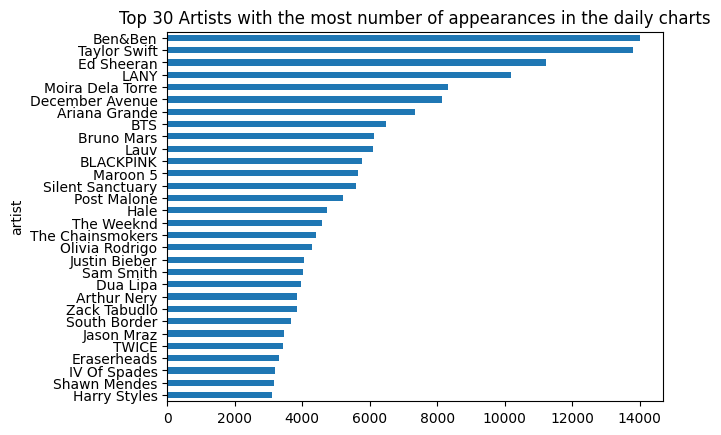

In [117]:
artist_count.plot.barh(title="Top 30 Artists with the most number of appearances in the daily charts").invert_yaxis()

In [118]:
benandben_tracks_count_df = charts_df[charts_df['artist'] == 'Ben&Ben']['track_name'].value_counts()
benandben_tracks_count_df

track_name
Kathang Isip                                                1929
Leaves                                                      1887
Maybe The Night                                             1842
Pagtingin                                                   1429
Araw-Araw                                                   1299
Sa Susunod na Habang Buhay                                  1128
Make It With You                                            1069
Lifetime                                                     592
Masyado Pang Maaga                                           447
Ride Home                                                    360
Paninindigan Kita                                            336
Pasalubong - feat. Moira Dela Torre                          317
Di Ka Sayang                                                 225
Nakikinig Ka Ba Sa Akin                                      206
The Ones We Once Loved                                       182
Leaves (feat. 

In [119]:
print("Total Count: " + str(benandben_tracks_count_df.sum()))

Total Count: 14003


From the table above that shows the frequency of each song made by `Ben & Ben` in the dataset, it can be seen that their song, `Kathang Isip` appeared in the charts for 1929 times in the charts, out of the 2280 days this data collection process was held.

# Result:


The graph created shows a data visualization of the top 30 artists in terms of their frequency in appearing in the Top 200 Spotify PH daily charts from 01/01/2017 to 31/03/2017. As observed, `Ben & Ben` are the mode artist of this dataset, having 14003 appearances in the daily charts throughout the entire duration of the data collection, just above Taylor Swift. This EDA can be used as basis on how a specific arist can be prevalent in the daily charts, which can be translated into categorical data for the association rule mining algorithm to process as well.

## Question 2:
### Is there a correlation between these features of a song, namely:

- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

### with the total number of recorded streams the song has during the timespan of the dataset.

To answer this question, each given variables from the list is tested for correlation with the number of total streams, and determine its relationship, whether it is positive or negative. 

This will help in answering the research question as it is useful for preliminary insights between the one dimensional relationship of a song feature and its overall popularity. The correlation matrix highlights the strong relationships, and can be used as basis for features in the beginning of answering the research question.

In [120]:
corr_df = charts_tracks_df[['track_id', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
corr_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048
...,...,...,...,...,...,...,...,...,...,...
4762,0zWuvPDqBa0WM9Ffwl0rgb,0.799,0.793,-4.938,0.0519,0.0108,0.000001,0.0496,0.467,102.006
4764,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071
4765,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961
4766,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048


In the table above, we can see the values corresponding to a song's features. From the data cleaning part, all duplicates and tracks with NaN were already cleaned. However, the total number of streams per song has not been obtained yet. To do this:

1. Obtain the total streams of each song by aggregating the streams of each track in `charts_df`.
2. This value can now be appended as a new series in `corr_df` by using libraries. 

In [121]:
#Step 1
charts_df_agg = charts_df[['track_id', 'streams']].groupby(['track_id']).sum().reset_index().sort_values(by=['streams'], ascending = False)
charts_df_agg

,track_id,streams
1878,3WUEs51GpcvlgU7lehLgLh,193403246
3079,5uCax9HTNlzGybIStD3vDh,157966745
1046,1yDiru08Q6omDOGkZMPnei,151687708
1160,2BgD4nRyx9EZ5o8YEnjRSV,147756258
803,1X4l4i472kW5ofFP8Xo0x0,138168088
...,...,...
3492,6hmhG1b4LEyNuashVvuIAo,12343
3920,7nD9nN3jord9wWcfW3Gkcm,11300
3995,7x5xYW5W42OGPAdHUyyguy,11209
3436,6bLopGnirdrilrpdVB6Um1,11097


Given this new dataframe, it is now possible to append the total streams of the songs to the dataframe containing all the song features.

In [122]:
#Step 2
corr_df = pd.merge(corr_df, charts_df_agg, on='track_id')
corr_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152,55764808
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043,157966745
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010,53598706
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000,17537094
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048,17518675
...,...,...,...,...,...,...,...,...,...,...,...
4015,0zWuvPDqBa0WM9Ffwl0rgb,0.799,0.793,-4.938,0.0519,0.0108,0.000001,0.0496,0.467,102.006,452401
4016,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071,191931
4017,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961,406800
4018,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048,324875


After completing all steps, it is now possible to observe the correlation between `streams` and the song features previously stated.

In [123]:
corr_df.corr()[['streams']]

ValueError: could not convert string to float: '0kN8xEmgMW9mh7UmDYHlJP'

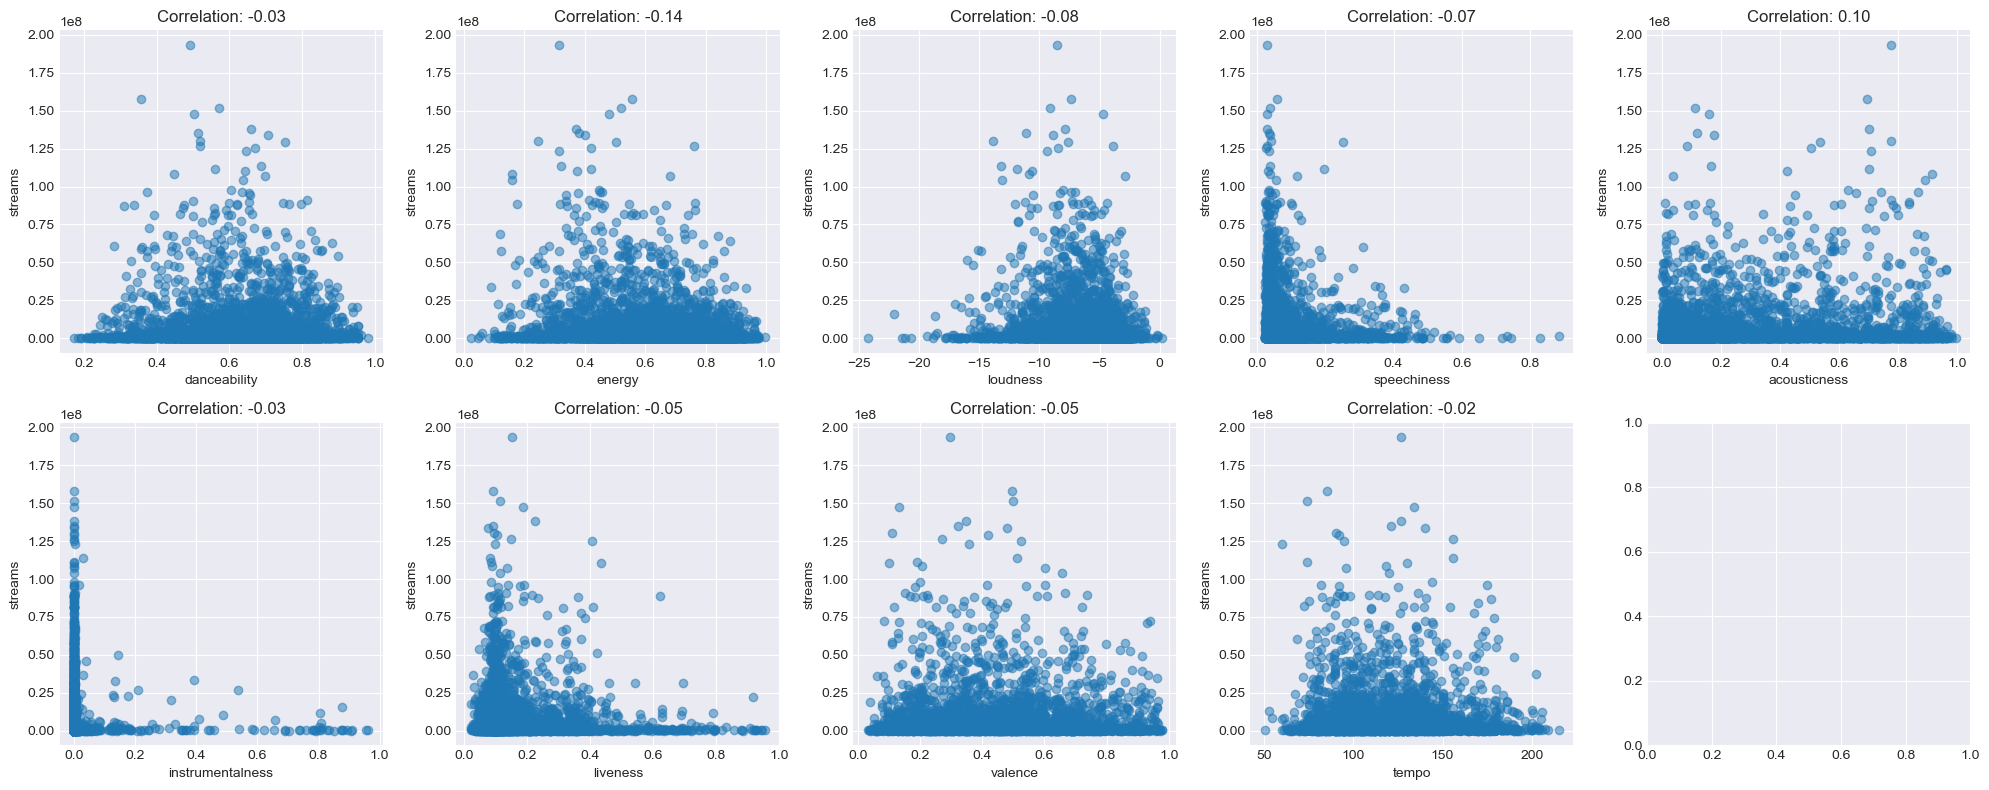

In [ ]:
song_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
y_col = 'streams'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, var in enumerate(song_features):
    corr = np.corrcoef(corr_df[var], corr_df[y_col])[0][1]
    axes[i//5, i%5].scatter(corr_df[var], corr_df[y_col], alpha=0.5)
    axes[i//5, i%5].set_xlabel(var)
    axes[i//5, i%5].set_ylabel(y_col)
    axes[i//5, i%5].set_title('Correlation: %.2f'%corr)
plt.tight_layout()
plt.show()

## Results:
### Coefficient Relationships of Song Features with `streams`
1. **Danceability** (-0.03),  **Instrumentalness** (-0.03), **Liveness** (-0.05), **Valence** (-0.05), **Tempo** (-0.02)
    - These song features do not have any correlation with `streams` as their correlation coefficient values are too low to consider any relationship.


2. **Energy** (-0.14), **Acousticness** (0.10), **Loudness** (-0.08), **Speechiness** (-0.07),
    - While these values are still considered weak, they are slightly stronger than the rest of the other song features.

From these results, it would seem in general that there is no correlation with track features with the total number of streams of a track. However, it may still be possible to discover more complex relationships between the features and the number of streams through the use of more complex statistical analyses such as machine learning and association rule mining, as correlation analysis may not provide the patterns that occur within the dataset. 

## Question 3:
### With the features stated above, which features are the most trending throughout the months among the top 200 daily spotify songs

To answer this question we will be borrowing the same line of code from Question #2 that sets up the list of tracks and the data regarding its features and store it in a variable we will call `monthly_200_df`

In [125]:
monthly_200_df = charts_tracks_df[['track_id', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
monthly_200_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048
...,...,...,...,...,...,...,...,...,...,...
4762,0zWuvPDqBa0WM9Ffwl0rgb,0.799,0.793,-4.938,0.0519,0.0108,0.000001,0.0496,0.467,102.006
4764,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071
4765,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961
4766,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048


We will then take the values found in `charts_df`, specifically the:

1. `track_id`   - the track's unique spotify ID
2. `position`   - the track's position in the Top 200 Daily with respect to the `date` it was part of it
3. `date`       - the date when the track was found in the Top 200 Daily

and store it in a variable we will label as `monthly_200_df_agg`

In [126]:
monthly_200_df_agg = charts_df[['track_id', 'position','date']]
monthly_200_df_agg.tail(5)

,track_id,position,date
456056,4VXIryQMWpIdGgYR4TrjT1,195,2023-03-31
456057,1Ry0l6trESL8T4ddsRaYLE,196,2023-03-31
456058,5qmXgeIDa1lXB07pgAVlNM,197,2023-03-31
456059,1xK59OXxi2TAAAbmZK0kBL,198,2023-03-31
456060,7bJwvubZZaoGE1AGEfu8Fi,199,2023-03-31


now we take the variable that contains the positions and dates (`monthly_200_df_agg`) and the variable that contains the track features we have selected (`monthly_200_df`) and combine them, creating the `combine_200_df` variable

We will be using the `monthly_200_df_agg` as the main keys as we are looking for the trending features of each month so duplicates within the Daily Top 200 should remain duplicated

In [127]:
combine_200_df = pd.merge(monthly_200_df_agg, monthly_200_df, how='left', on='track_id')
combine_200_df.tail(6)

,track_id,position,date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
456055,1wjzFQodRWrPcQ0AnYnvQ9,194,2023-03-31,0.752,0.505,-7.621,0.2530,0.5350,0.000003,0.1040,0.419,91.970
456056,4VXIryQMWpIdGgYR4TrjT1,195,2023-03-31,0.671,0.529,-7.226,0.3070,0.0769,0.000335,0.0856,0.203,161.989
456057,1Ry0l6trESL8T4ddsRaYLE,196,2023-03-31,0.480,0.299,-12.077,0.0525,0.8380,0.000000,0.1330,0.196,121.750
456058,5qmXgeIDa1lXB07pgAVlNM,197,2023-03-31,0.548,0.554,-6.408,0.0587,0.2830,0.000000,0.0708,0.382,79.918
456059,1xK59OXxi2TAAAbmZK0kBL,198,2023-03-31,0.571,0.544,-10.613,0.0299,0.4530,0.008050,0.3220,0.216,132.052
456060,7bJwvubZZaoGE1AGEfu8Fi,199,2023-03-31,0.624,0.618,-4.868,0.0322,0.1150,0.000003,0.1040,0.122,125.036


To make things simpler for us, we are going to create a new column that takes the month from the `date` column and copies its value to the new column that we will then call `month`

In [128]:
combine_200_df['month'] = combine_200_df['date'].dt.month
combine_200_df

,track_id,position,date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month
0,0kN8xEmgMW9mh7UmDYHlJP,1,2017-01-01,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152,1
1,5uCax9HTNlzGybIStD3vDh,2,2017-01-01,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043,1
2,7BKLCZ1jbUBVqRi2FVlTVw,3,2017-01-01,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010,1
3,2rizacJSyD9S1IQUxUxnsK,4,2017-01-01,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000,1
4,5MFzQMkrl1FOOng9tq6R9r,5,2017-01-01,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456056,4VXIryQMWpIdGgYR4TrjT1,195,2023-03-31,0.671,0.529,-7.226,0.3070,0.0769,0.000335,0.0856,0.203,161.989,3
456057,1Ry0l6trESL8T4ddsRaYLE,196,2023-03-31,0.480,0.299,-12.077,0.0525,0.8380,0.000000,0.1330,0.196,121.750,3
456058,5qmXgeIDa1lXB07pgAVlNM,197,2023-03-31,0.548,0.554,-6.408,0.0587,0.2830,0.000000,0.0708,0.382,79.918,3
456059,1xK59OXxi2TAAAbmZK0kBL,198,2023-03-31,0.571,0.544,-10.613,0.0299,0.4530,0.008050,0.3220,0.216,132.052,3


after that we are going to group the table by the month column we have created and assign it to the variable `combine_200_gb`

to check if it was a success, we will now access the 6th group, which is the month of June

In [129]:
combine_200_gb = combine_200_df.groupby(by='month')
combine_200_gb.get_group(6)

,track_id,position,date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month
30200,72Q0FQQo32KJloivv5xge2,1,2017-06-01,0.599,0.667,-4.267,0.0367,0.0533,0.000000,0.1340,0.817,80.984,6
30201,5CtI0qwDJkDQGwXD1H1cLb,2,2017-06-01,0.694,0.815,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931,6
30202,7qiZfU4dY1lWllzX7mPBI3,3,2017-06-01,0.825,0.652,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,6
30203,6RUKPb4LETWmmr3iAEQktW,4,2017-06-01,0.617,0.635,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019,6
30204,0KKkJNfGyhkQ5aFogxQAPU,5,2017-06-01,0.853,0.560,-4.961,0.0406,0.0130,0.000000,0.0944,0.860,134.066,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401385,3aYCsSuW6ZgIESGteMF586,196,2022-06-30,0.517,0.544,-5.633,0.0258,0.0562,0.000000,0.1200,0.396,80.072,6
401386,1e9oZCCiX42nJl0AcqriVo,197,2022-06-30,0.548,0.816,-4.209,0.0465,0.1220,0.000000,0.3350,0.557,95.390,6
401387,1NopgVCMVhCKIm64tF7auX,198,2022-06-30,0.328,0.465,-9.810,0.0328,0.7200,0.000002,0.1750,0.344,148.912,6
401388,0Yde1VrWbGF2Tus2AQhMuT,199,2022-06-30,0.703,0.756,-3.407,0.0376,0.2220,0.002810,0.0829,0.536,119.999,6


all that is left is to get the mean of each feature per month and place them on a line graph where the `X-Value` corresponds to the `month` and the `Y-Value` corresponds to the mean of the specified feature

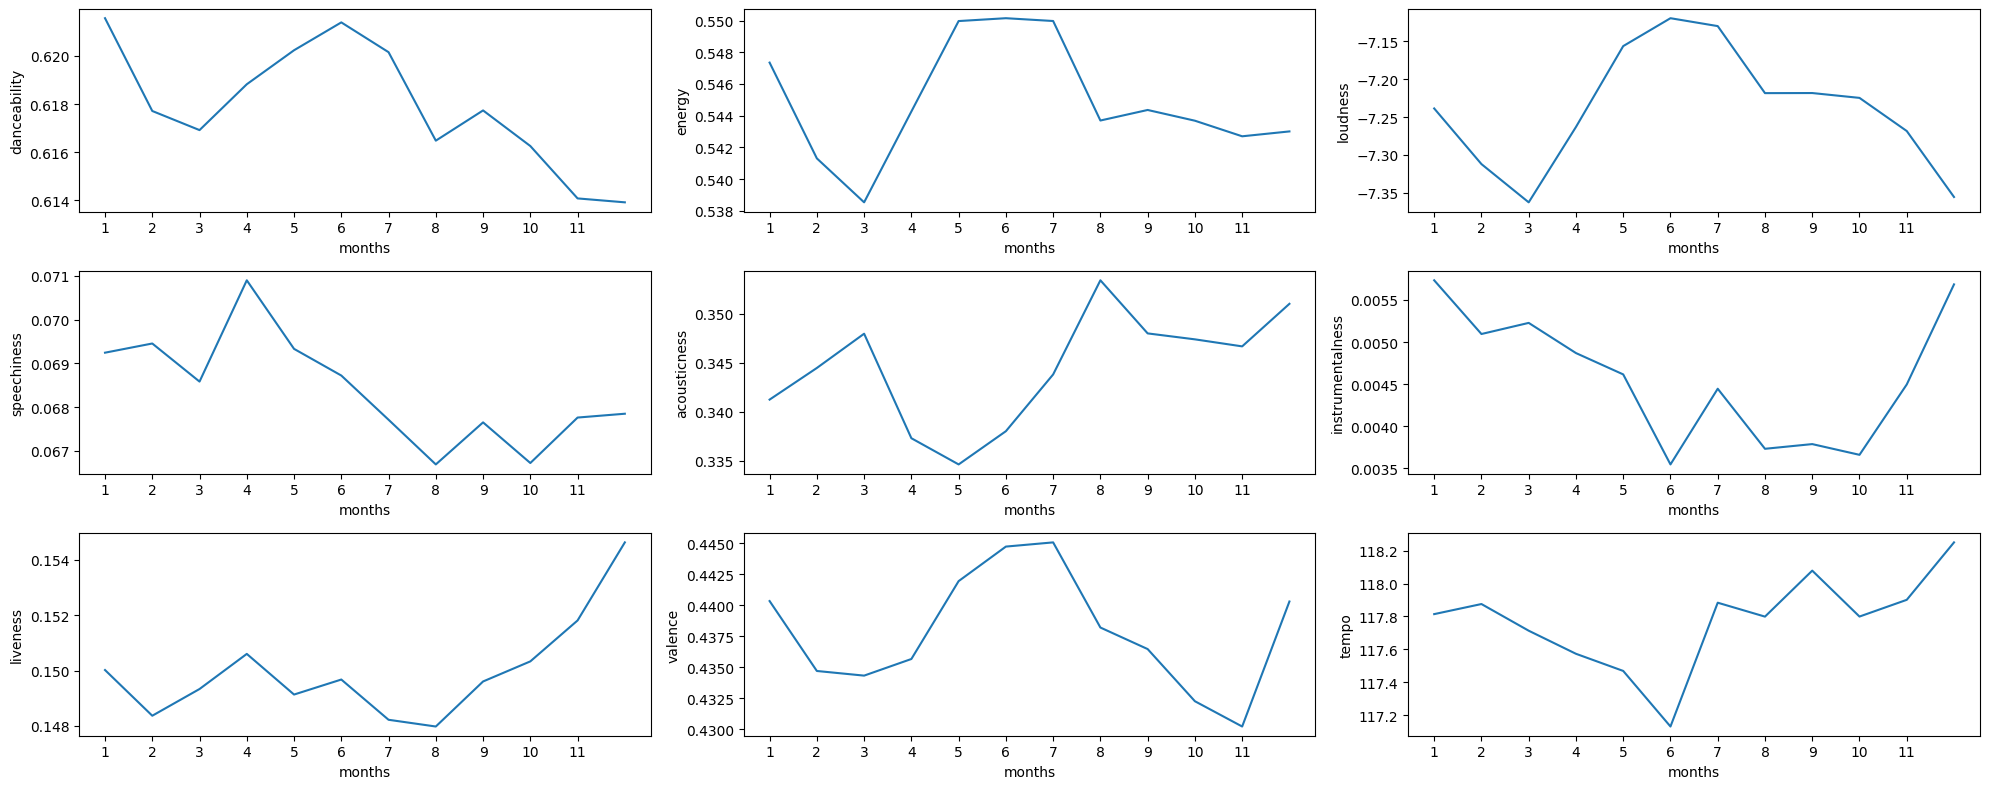

In [130]:
song_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
months = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

m_dict = dict()
m_arr = list()

fig, bars = plt.subplots(nrows=3, ncols=3, figsize=(20, 8))

for i, var in enumerate(song_features):    
    for j in range(12):
        key = combine_200_gb.get_group(j+1)[var].mean()
        m_dict[j+1] = key
    bars[i//3, i%3].plot(m_dict.keys(), m_dict.values())
    bars[i//3, i%3].set_xlabel('months')
    bars[i//3, i%3].set_ylabel(var)
    bars[i//3, i%3].set_xticks(np.arange(1, 12, 1.0))
    m_arr.append(dict(m_dict))
    # plt.plot(m_dict.values())
    # plt.ylabel(var)
    # plt.xlabel(months[i])
plt.tight_layout()
plt.show()

In [131]:
pd.DataFrame.from_dict(m_arr[1], orient='index', columns=list({song_features[1]}))

,energy
1,0.547350
2,0.541302
3,0.538527
4,0.544263
5,0.549973
6,0.550153
7,0.549976
8,0.543693
9,0.544359
10,0.543681


## Question 4:

# Research Question

Given the observations that arose from the exploratory data analysis, the group would like to further explore the relationships between different combinations of the many song features that tend to associate with a higher count of `streams`. 


### *Which specific combinations of song features, artist popularity, frequency of appearances in the Philippines daily charts, and particular months are strongly associated with a significant increase in the number of streams on Spotify?*

## Data Mining Technique

This research question focuses on finding the right combinations of the different data found in the dataset, in order to come up with statistical observations that lead to a higher number of `streams`. To answer this question, a methodology of performing **Association Rule Mining** can be performed with numerical data being preprocessed into categorical data through the use of techniques such as binning.

**Example:**

To create a rule based on song features, these can be binned like this:

| Energy | Range |
|-------------|----------|
| High Energy | 0.7 - 1.0|
| Medium Energy | 0.4 - 0.6 |
| Low Energy | 0.0 - 0.3 |

therefore, rules such as:

> Low Energy + High Acousticness + Ben&Ben + Febuary ==> High Streams

can be created, and be tested for usefulness.
    

All numerical data that represents a range of values can be binned into categories that will be used for Association Rule Mining since this data mining technique focuses on identifying significant associations and patterns within categorical data. Through the categorization of these numerical data into specific bins, the algorithm would be able to effectively capture the relationships between different groups to create insights simple data analyses such as linear correlation wouldn't be able to produce. This enables a more complex analysis of the Spotify daily charts dataset, allowing the discovery of valuable associations that answer the research question.

## Importance and Relevance

Discovering and understanding different combinations aimed at achieving popularity can be used for artists to curate effective promotion strategies that target the combinations derived from the data mining technique performed. This, in turn could potentially increase the probability of a successful release and obtain an increased number of streams. The insights gained from this study can also be used as basis for music labels and groups to make informed decisions on release timing, artist hiring, and content based on the discovered combinations, leading to more effective and secure investments, as well as better tailored campaigns.